<a href="https://colab.research.google.com/github/wendirad/weekTwo/blob/task_3/notebooks/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [37]:
data = pd.read_excel('data.xlsx')
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [38]:
# Replace 0 values with mean for numerical columns
numerical_columns = [
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)'
]

for column in numerical_columns:
    data[column] = data[column].replace(0, data[column].mean())
    data[column] = data[column].fillna(data[column].mean())

# Replace null values with the mode for categorical columns
categorical_columns = ['Handset Type']
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

In [39]:
# Calculate Average RTT
data['Average RTT (ms)'] = (data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']) / 2
data[['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Average RTT (ms)']].head()

,Avg RTT DL (ms),Avg RTT UL (ms),Average RTT (ms)
0,42.000000,5.000000,23.500000
1,65.000000,5.000000,35.000000
2,109.803794,18.259312,64.031553
3,109.803794,18.259312,64.031553
4,109.803794,18.259312,64.031553


- **High RTT values** indicate network delays, which can result in poor user experiences (e.g., slow loading times, buffering).
- **Low RTT values** signify better network performance and faster responses.

In [40]:
data['Average TCP Retransmission (Bytes)'] = (data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']) / 2
data['Average Throughput (kbps)'] = (data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']) / 2


In [41]:
# Group by MSISDN
aggregated_data = data.groupby('MSISDN/Number').agg({
    'Average TCP Retransmission (Bytes)': 'mean',
    'Average RTT (ms)': 'mean',
    'Average Throughput (kbps)': 'mean',
    'Handset Type': lambda x: x.mode()[0]  # Most frequent handset type
}).reset_index()

In [42]:
aggregated_data

,MSISDN/Number,Average TCP Retransmission (Bytes),Average RTT (ms),Average Throughput (kbps),Handset Type
0,3.360100e+10,1.078479e+07,31.831441,38.000000,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,1.078479e+07,15.500000,49.500000,Apple iPhone 7 (A1778)
2,3.360100e+10,1.078479e+07,64.031553,48.500000,undefined
3,3.360101e+10,3.803623e+05,42.000000,124.000000,Apple iPhone 5S (A1457)
4,3.360101e+10,7.735101e+06,34.165721,14211.000000,Apple iPhone Se (A1723)
...,...,...,...,...,...
106851,3.379000e+10,1.090225e+05,26.000000,5182.500000,Huawei Honor 9 Lite
106852,3.379000e+10,1.078479e+07,20.000000,58.000000,Apple iPhone 8 Plus (A1897)
106853,3.197021e+12,1.078479e+07,64.031553,885.714323,Quectel Wireless. Quectel Ec25-E
106854,3.370000e+14,1.078479e+07,64.031553,16.500000,Huawei B525S-23A


In [43]:
# Top 10 values
top_tcp = aggregated_data['Average TCP Retransmission (Bytes)'].nlargest(10)
top_rtt = aggregated_data['Average RTT (ms)'].nlargest(10)
top_throughput = aggregated_data['Average Throughput (kbps)'].nlargest(10)

print("Top 10 values for TCP Retransmission:")
print(top_tcp)
print("\nTop 10 values for Average RTT:")
print(top_rtt)
print("\nTop 10 values for Average Throughput:")
print(top_throughput)

Top 10 values for TCP Retransmission:
85785    2.150739e+09
32273    2.144060e+09
58026    2.134324e+09
31942    2.127330e+09
62049    2.105629e+09
70079    2.083297e+09
43629    2.068969e+09
48341    2.058902e+09
64113    1.984060e+09
98211    1.893435e+09
Name: Average TCP Retransmission (Bytes), dtype: float64

Top 10 values for Average RTT:
47983     48462.00
80249     27424.00
41944     16167.50
93844     13639.00
1713      13150.00
74240     12857.50
104325    12694.00
105752    12369.00
85683     11505.25
15409     10490.00
Name: Average RTT (ms), dtype: float64

Top 10 values for Average Throughput:
37838     141965.50
49595     132862.00
60763     132588.25
52830     127475.00
14564     119491.00
10359     117682.50
104697    115491.00
27722     114151.50
92374     113667.00
98280     113252.50
Name: Average Throughput (kbps), dtype: float64


In [44]:
# Bottom 10 values
bottom_tcp = aggregated_data['Average TCP Retransmission (Bytes)'].nsmallest(10)
bottom_rtt = aggregated_data['Average RTT (ms)'].nsmallest(10)
bottom_throughput = aggregated_data['Average Throughput (kbps)'].nsmallest(10)

print("Bottom 10 values for TCP Retransmission:")
print(bottom_tcp)
print("\nBottom 10 values for Average RTT:")
print(bottom_rtt)
print("\nBottom 10 values for Average Throughput:")
print(bottom_throughput)

Bottom 10 values for TCP Retransmission:
23472     48.5
6359      64.0
96977     64.5
13546     67.0
2177      71.5
25863     88.0
102198    88.0
105775    88.5
78100     89.5
89395     91.0
Name: Average TCP Retransmission (Bytes), dtype: float64

Bottom 10 values for Average RTT:
17863    5.0
10380    6.0
12558    6.0
21020    6.0
77486    6.0
4169     6.5
8125     6.5
8543     6.5
15007    6.5
15164    6.5
Name: Average RTT (ms), dtype: float64

Bottom 10 values for Average Throughput:
4878     1.0
4932     1.0
11120    1.0
11656    1.0
25114    1.0
30476    1.0
47738    1.0
51850    1.0
52345    1.0
57666    1.0
Name: Average Throughput (kbps), dtype: float64


In [45]:
throughput_per_handset = data.groupby('Handset Type')['Average Throughput (kbps)'].mean().sort_values(ascending=False)


In [46]:
throughput_per_handset

,Average Throughput (kbps)
Handset Type,
Huawei B715S-23C,54497.115385
New-Bund Technol. Mix 2,52605.500000
Lg G6+,50067.500000
Zyxel Communicat. Sbg3600,48675.500000
Huawei Y9 2019,45869.500000
...,...
Samsung Galaxy Wave Y (Gt-S5380),2.000000
Concox Informati. Gt06,1.500000
Concox Informati. Concox Gt06 Gt06N Tr06,1.000000


<ipython-input-47-75b95fd48d98>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


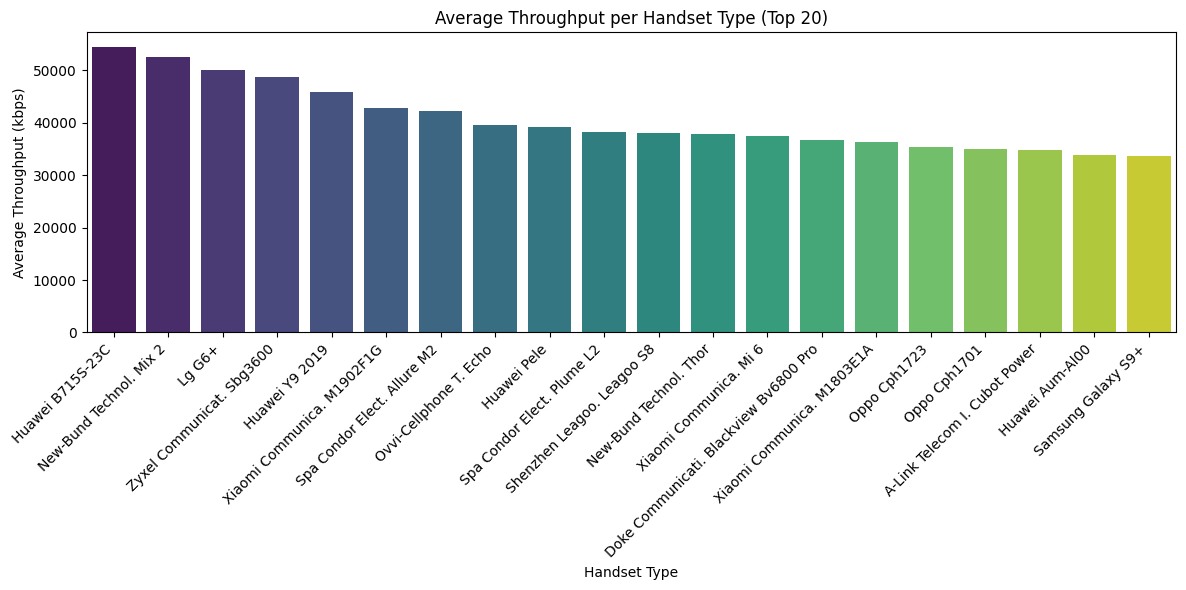

In [47]:
# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(
    x=throughput_per_handset.index[:20],  # Top 20 handset types
    y=throughput_per_handset.values[:20],
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.title('Average Throughput per Handset Type (Top 20)')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.tight_layout()
plt.show()

**Device Capabilities:**
Devices with higher throughput those at the top (Huawei B715S-23C,New-Bund Technol. Mix 2....) often have advanced hardware (e.g., 4G/5G compatibility, better processors) and efficient network protocols.
Devices with lower throughput might struggle with older technology or limited hardware optimizations.

**Use Cases:**
High-throughput devices are ideal for heavy data usage, such as video streaming, gaming, or large file downloads.
Lower-throughput devices may perform adequately for general tasks like browsing or messaging.

**Network Influence:**
Variability in throughput can also depend on the network quality, such as the availability of high-speed infrastructure or congestion.